# Práctica 1 - PREDICCIÓN DE LA PRODUCCIÓN DE ENERGÍA EÓLICA

### Aprendizaje Automático


Jaime Ballesteros Calvo - **100454114**

Nicolás Lamotte Fresno - **100454275**

---

### GitHub
- nombre repositorio: p1_aprendizaje_automatico_Jaime_Nicolas
- usuario: NicolasLamotteUC3M
- link: https://github.com/NicolasLamotteUC3M/p1_aprendizaje_automatico_Jaime_Nicolas

---


<h1 style='text-align: center;'> NOTEBOOK 3: CLASIFICACIÓN </h1>


## Importación Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

wind_ava = wind_ava.set_index('datetime')
wind_ava.index = pd.to_datetime(wind_ava.index)

In [3]:
for c in wind_ava.columns:
    if not c.endswith('.13') and c != 'energy':
        wind_ava.drop(c, axis = 1, inplace=True)

wind_ava.drop(columns=['lai_hv.13'], inplace=True)
wind_ava.drop(columns=['lai_lv.13'], inplace=True)

wind_ava.drop(columns=['stl3.13'], inplace=True)
wind_ava.drop(columns=['stl4.13'], inplace=True)

wind_ava.drop(columns=['fsr.13'], inplace=True)

wind_ava.drop(columns=['p54.162.13'], inplace=True)
wind_ava.drop(columns=['p59.162.13'], inplace=True)
wind_ava.drop(columns=['p55.162.13'], inplace=True)

In [4]:
wind_ava

,energy,cape.13,u10n.13,v10n.13,sp.13,stl1.13,u10.13,v10.13,t2m.13,stl2.13,iews.13,inss.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,13.527577,-0.757587,-1.922799,99846.319914,280.960661,-0.906454,-2.709511,280.473098,281.042026,-0.057958,-0.138650,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,696.80,6.896412,-1.412620,-1.403011,99917.733093,279.296651,-1.653843,-1.641837,278.286616,280.747406,-0.103576,-0.083050,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,1591.15,4.774439,-2.290185,-0.754580,99764.378681,278.233956,-2.580356,-0.793682,277.206490,280.114863,-0.165721,-0.036241,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,1338.62,0.000000,-3.497855,1.271028,99672.670459,280.787263,-3.365262,1.227559,280.926600,279.991138,-0.275550,0.098192,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,562.50,0.000000,-0.971249,0.553060,99372.811211,279.583112,-2.242707,1.320793,277.363875,280.576898,-0.056553,0.041844,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,24.971074,4.595786,5.563189,95460.434452,281.680110,4.645265,5.621756,280.731326,282.643490,0.628948,0.879581,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,855.00,60.248874,4.894838,5.577096,95663.765406,282.842686,4.876985,5.562963,283.310687,282.370909,0.740926,0.699769,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,117.06,3.145067,0.958361,0.948029,95653.110509,282.027412,1.302978,1.425508,281.060085,282.425812,0.109802,0.125174,-5.866856,3.033799,3.568993


In [5]:
X = wind_ava.drop(columns=['energy'])
y = wind_ava['energy']

X_train = X.loc[:'2009-03-03']
y_train = y.loc[:'2009-03-03']

X_test = X.loc['2009-03-04':]
y_test = y.loc['2009-03-04':]

### Predicciones del Modelo Final

In [6]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svr_model = SVR(C=1100, degree=1, gamma='auto', kernel='rbf')

final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', svr_model)
])

In [7]:
from sklearn.metrics import r2_score

final_model.fit(X_train, y_train)

predictions = final_model.predict(X_test)

score = r2_score(y_test, predictions)

In [8]:
X_train

,cape.13,u10n.13,v10n.13,sp.13,stl1.13,u10.13,v10.13,t2m.13,stl2.13,iews.13,inss.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,
2005-01-02 18:00:00,13.527577,-0.757587,-1.922799,99846.319914,280.960661,-0.906454,-2.709511,280.473098,281.042026,-0.057958,-0.138650,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,6.896412,-1.412620,-1.403011,99917.733093,279.296651,-1.653843,-1.641837,278.286616,280.747406,-0.103576,-0.083050,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,4.774439,-2.290185,-0.754580,99764.378681,278.233956,-2.580356,-0.793682,277.206490,280.114863,-0.165721,-0.036241,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,0.000000,-3.497855,1.271028,99672.670459,280.787263,-3.365262,1.227559,280.926600,279.991138,-0.275550,0.098192,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,0.000000,-0.971249,0.553060,99372.811211,279.583112,-2.242707,1.320793,277.363875,280.576898,-0.056553,0.041844,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-02-24 00:00:00,0.000000,0.616428,0.865628,97914.485585,282.814800,1.358885,1.949778,284.041069,283.471287,0.033773,0.081090,-5.929224,2.533687,3.353960
2008-02-24 06:00:00,17.809416,0.129590,0.402165,97834.193324,282.514650,0.142907,1.380282,282.631601,283.084260,0.003857,0.019154,-5.879858,1.326827,1.044971
2008-02-24 12:00:00,9.852017,-1.654745,0.352099,97965.730567,284.013881,-1.511501,0.306694,284.997036,283.030517,-0.062917,0.035643,-5.689764,-2.036895,0.715686


In [9]:
final_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=1100, degree=1, gamma='auto'))])

In [10]:
score

0.6811126714555454

## Modelo de Clasificación

### Análisis predicciones valores Altos/Bajos

In [11]:
from sklearn.metrics import mean_squared_error

# Convertir y_test a un numpy.ndarray
y_test_array = y_test.to_numpy()

# Calcular el tercer cuartil de y_test
third_quartile = np.quantile(y_test_array, 0.75)

# Identificar los índices correspondientes a los valores bajos y altos en y_test
low_indices = np.where(y_test_array <= third_quartile)
high_indices = np.where(y_test_array > third_quartile)

# Extraer las predicciones correspondientes a los valores bajos y altos
predictions_low = predictions[low_indices]
predictions_high = predictions[high_indices]
y_test_low = y_test_array[low_indices]
y_test_high = y_test_array[high_indices]

# Calcular RMSE para ambos conjuntos
rmse_low = mean_squared_error(y_test_low, predictions_low, squared=False)
rmse_high = mean_squared_error(y_test_high, predictions_high, squared=False)

# Comparar los valores de RMSE
print("RMSE para valores bajos:", rmse_low)
print("RMSE para valores altos:", rmse_high)

RMSE para valores bajos: 280.6799073715641
RMSE para valores altos: 575.3256055767271


#### Conclusión

Las predicciones para **valores altos** son **peores** que para valores bajos. Esto podría indicar que el modelo tiene dificultades para predecir correctamente el consumo de energía en situaciones de altos valores.

### Conversión a Problema de Clasificación

In [12]:
umbral = np.quantile(y_train, 0.75)

In [13]:
# Transformar los valores de la variable objetivo en clases "altos" y "bajos"
y_train_clases = np.where(y_train >= umbral, 'alto', 'bajo')
y_test_clases = np.where(y_test >= umbral, 'alto', 'bajo')

In [14]:
y_train_clases

array(['bajo', 'bajo', 'alto', ..., 'bajo', 'bajo', 'bajo'], dtype='<U4')

### Resultados

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings

# Desactivar las advertencias de SciPy
warnings.filterwarnings("ignore", category=FutureWarning)

classifiers = {
    'Dummy': DummyClassifier(strategy='most_frequent', random_state=100454275),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=100454275),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=100454275),
    'SVM': SVC(class_weight='balanced', random_state=100454275),
    'Gradient Boosting': GradientBoostingClassifier(random_state=100454275),
    'KNN': KNeighborsClassifier()
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train_clases)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test_clases, y_pred)
    recall = recall_score(y_test_clases, y_pred, pos_label='bajo')
    balanced_acc = balanced_accuracy_score(y_test_clases, y_pred)

    print(f"{name} Classifier:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}\n")


Dummy Classifier:
Accuracy: 0.7600
Recall: 1.0000
Balanced Accuracy: 0.5000

Decision Tree Classifier:
Accuracy: 0.8078
Recall: 0.8757
Balanced Accuracy: 0.7342

Logistic Regression Classifier:
Accuracy: 0.6200
Recall: 0.6043
Balanced Accuracy: 0.6370

SVM Classifier:
Accuracy: 0.2400
Recall: 0.0000
Balanced Accuracy: 0.5000

Gradient Boosting Classifier:
Accuracy: 0.8556
Recall: 0.9314
Balanced Accuracy: 0.7734

KNN Classifier:
Accuracy: 0.7524
Recall: 0.9086
Balanced Accuracy: 0.5832



#### Conclusiones


Estos resultados muestran que cada clasificador tiene su propio desempeño en términos de precisión, recall y balanced accuracy.

El **Dummy Classifier**, aunque tiene una **alta precisión** del 76%, su **recall es perfecto**, lo que indica que predice todas las muestras positivas, pero su **balanced accuracy** es baja, lo que sugiere que su **desempeño es bajo en general**.

El **Decision Tree Classifier** tiene una precisión del 80.78%, un recall del 87.57% y una balanced accuracy del 73.42%, mostrando un **desempeño sólido y equilibrado** en comparación con el Dummy Classifier.

La **Logistic Regression Classifier** tiene una precisión del 62%, un recall del 60.43% y una balanced accuracy del 63.70%, indicando un **desempeño moderado** en la clasificación.

El **SVM Classifier** tiene la precisión más baja del 24%, un recall del 0%, y una balanced accuracy del 50%, lo que sugiere que su **capacidad** para clasificar correctamente es muy **limitada**.

El **Gradient Boosting Classifier** muestra un **buen desempeño** con una precisión del 85.56%, un recall del 93.14% y una balanced accuracy del 77.34%, lo que indica una **capacidad sólida** para clasificar correctamente.

El **KNN Classifier** tiene una precisión del 75.24%, un recall del 90.86%, y una balanced accuracy del 58.32%, lo que muestra un **rendimiento moderado** pero con un **recall alto**.

## Uso Chat-GPT

Entre otras cosas, hemos utilizado Chat-GPT para:

- **Realizar tablas resumen**: Chat-GPT nos ha sido de gran ayuda para elaborar tablas, como la que se muestra en la evaluación de hiperparámetros. Para obtenerlas, explicábamos el contenido de los diccionarios con la información de las ejecuciones y solicitábamos la creación de una tabla resumen.

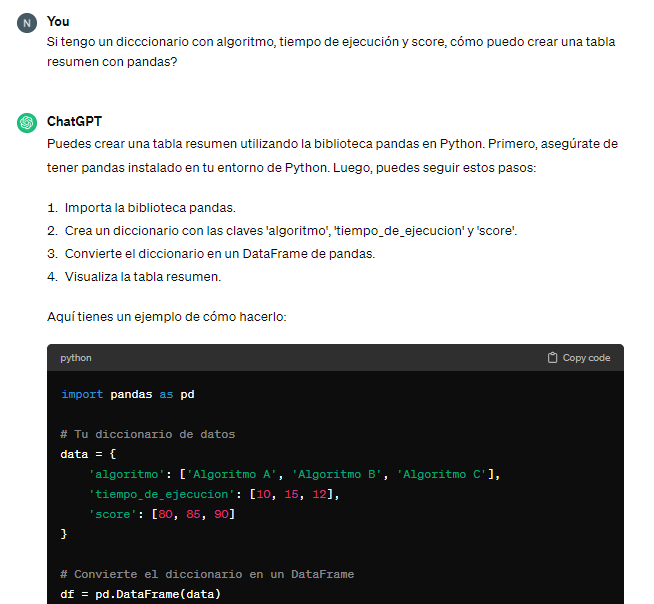

- **Obtener gráficos**: También hemos utilizado esta herramienta para generar gráficos de manera rápida. Por ejemplo, en el análisis de características, hemos creado gráficos para mostrar las desviaciones y distribuciones de las variables.

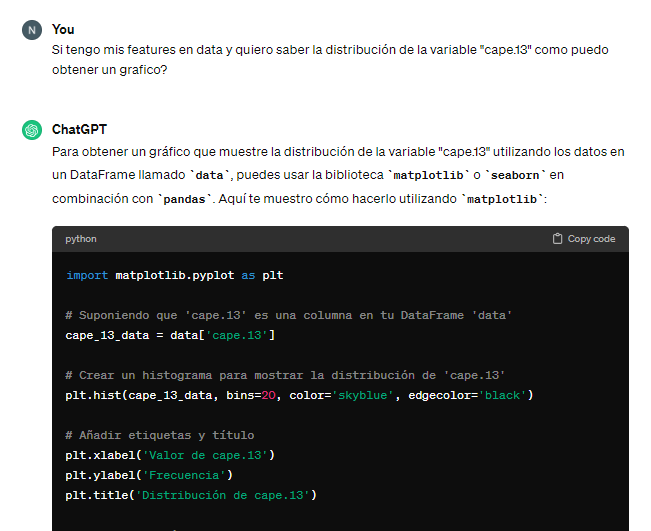

- **Resolución de errores**: Cuando surgían errores durante las ejecuciones, pedíamos a Chat-GPT que nos explicara su origen. Obteníamos respuestas como la siguiente:

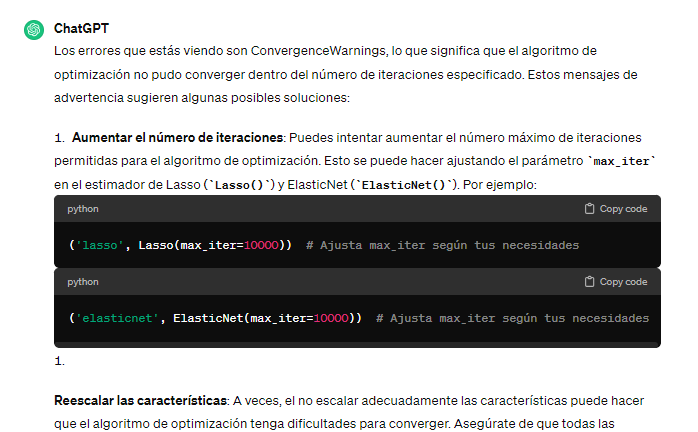

- **Realizar operaciones sobre el conjunto de datos**: Ya sea para añadir o eliminar datos en la etapa de preprocesamiento, nos hemos apoyado en esta herramienta para llevar a cabo dichas operaciones.

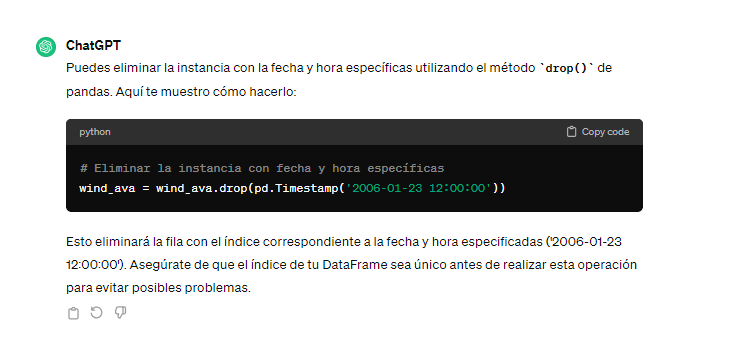